In [406]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import dynamics as efn
import LCE as lfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Eigenspectra
* Variance captured across each PC


In [102]:
bln_pcv = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN*pcavar.npy')
p5_pcv = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ05*pcavar.npy')
p20_pcv = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20*pcavar.npy')
data_list = bln_pcv, p5_pcv, p20_pcv
data_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_pcavar.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_pcavar.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_pcavar.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_pcavar.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_pcavar.npy',
  'PTZ-WILDTYPE-08_2photon_se

In [124]:
from scipy import stats

#Load data into list
list_list, slope_list = list(range(len(data_list))),list(range(len(data_list)))

for i in range(len(data_list)):
    first_list = list(range(len(data_list[i])))
    slope = list(range(len(data_list[i])))
    for e in range(len(data_list[i])):
        data = np.load(data_list[i][e])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        first_list[e] = xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1]
        slope[e] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    list_list[i] = first_list
    slope_list[i] = slope

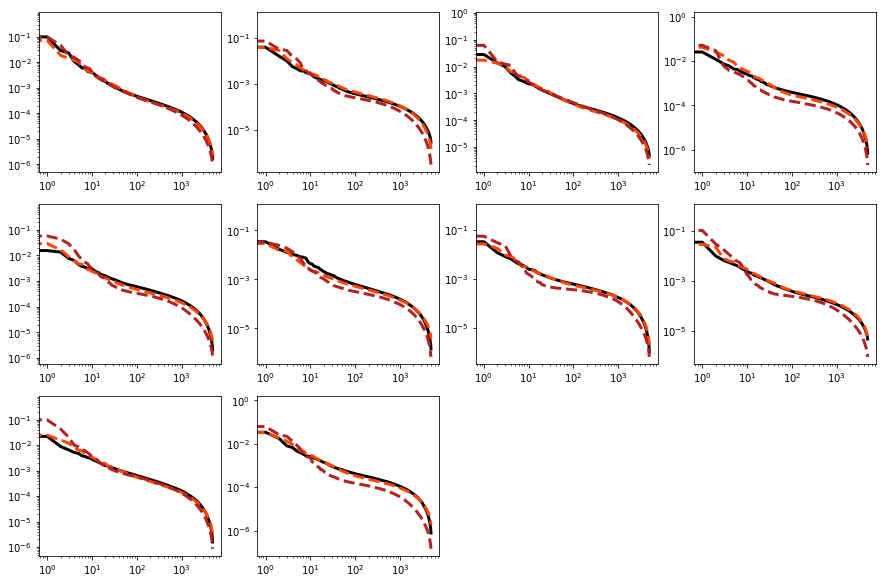

In [115]:
rows = 3
cols = 4
size = (15,10)
plot_type = 'plot'
col_list = ['k', 'orangered', 'firebrick']
width_list = [3, 3, 3]
style_list = ['-', '--', '--']
adfn.multi_plot_share (list_list, col_list,width_list, style_list, 'plot', size, 3, 4, 'log')

In [156]:
#Calculate average plot
bln_mean, sz_mean = np.zeros((np.load(bln_pcv[0]).shape[0], len(bln_pcv))), np.zeros((np.load(bln_pcv[0]).shape[0], len(bln_pcv)))

for i in range(len(bln_pcv)):
    bln_mean[:,i] = np.load(bln_pcv[i])
    sz_mean[:,i] = np.load(p20_pcv[i])
    
bln_mean = np.mean(bln_mean, axis=1)
sz_mean = np.mean(sz_mean, axis=1)

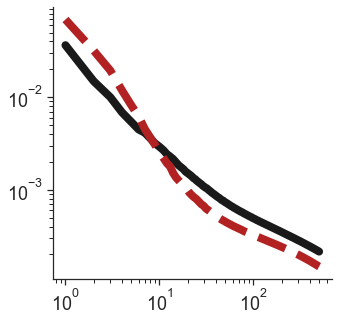

In [158]:
#Average plot
from scipy import stats
from matplotlib import cm


colors = ['k', 'firebrick']
lines = ['-', '--']
stop = 500

plot_list = bln_mean, sz_mean

fig, axarr = plt.subplots(figsize = (5,5))
for x, data in enumerate(plot_list):
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[1:len(xaxis)-1][:stop], yaxis[1:len(xaxis)-1][:stop], '-', linewidth = 8, markersize = 1, alpha = 1, color = colors[x] , linestyle = lines[x])
axarr.set_xscale('log')
axarr.set_yscale('log')
plt.yticks(size = 18)
plt.xticks(size = 18, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'eigspec_ptz.svg', transparent = True)
plt.show()

In [116]:
#Plot cumulative eigenspectra
def cumulative(input_vec):
    count = 0
    output_vec = np.zeros(input_vec.shape)
    for i in range(len(input_vec)):
        count = count + input_vec[i]
        output_vec[i] = count
    return(output_vec)

list_list = list(range(len(data_list)))
for i in range(len(data_list)):
    first_list = list(range(len(data_list[i])))
    for e in range(len(data_list[i])):
        data = np.load(data_list[i][e])
        xaxis = np.linspace(1,np.shape(data)[0], num = np.shape(data)[0])
        yaxis = cumulative(data)
        first_list[e] = xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1]
    list_list[i] = first_list

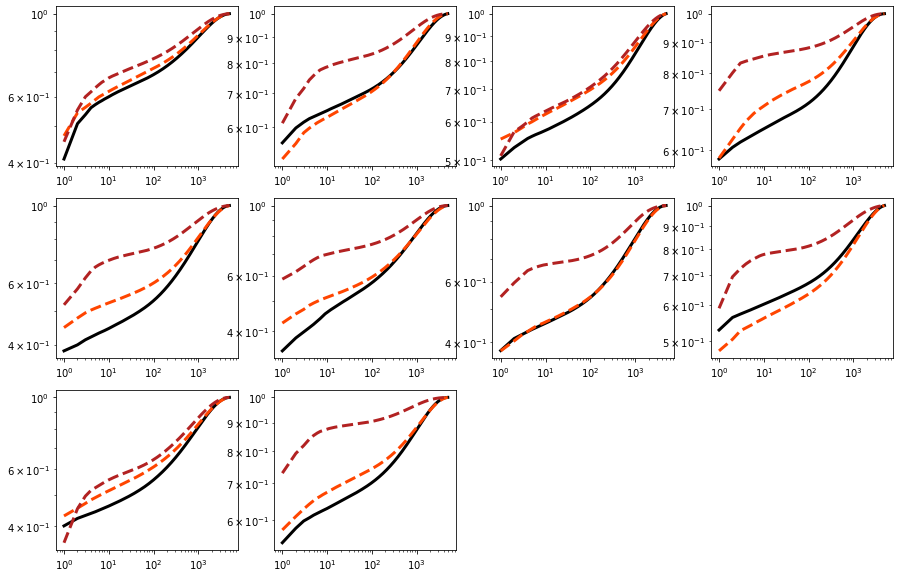

In [117]:
rows = 3
cols = 4
size = (15,10)
plot_type = 'plot'
col_list = ['k', 'orangered', 'firebrick']
width_list = [3, 3, 3]
style_list = ['-', '--', '--']
adfn.multi_plot_share (list_list, col_list,width_list, style_list, 'plot', size, 3, 4, 'log')

In [135]:
from matplotlib import cm
cond = ['BLN', "PTZ05", 'PTZ20']
num = np.arange(0, len(slope_list[0]))
cond_data = adfn.cond_list(slope_list, cond, 'dataset')
num_data = adfn.cond_list(slope_list, num, 'datapoint')
exponent = adfn.comb_list(slope_list)

mean_colours = ['k', 'orangered', 'firebrick']
colours  = cm.Spectral_r(np.linspace(0,1,len(slope_list[0])))
ex_df = pd.DataFrame( {'Exponent':   exponent, 'condition': cond_data, 'subject': num_data } )
ex_df

Exponent condition  subject
0   1.238503       BLN        0
1   1.117470       BLN        1
2   1.012632       BLN        2
3   1.362005       BLN        3
4   1.205434       BLN        4
5   1.281855       BLN        5
6   1.293375       BLN        6
7   1.013417       BLN        7
8   1.252510       BLN        8
9   1.316550       BLN        9
10  1.207418     PTZ05        0
11  1.281569     PTZ05        1
12  1.049464     PTZ05        2
13  1.260554     PTZ05        3
14  1.074883     PTZ05        4
15  1.106699     PTZ05        5
16  1.194751     PTZ05        6
17  1.006394     PTZ05        7
18  1.166868     PTZ05        8
19  1.167277     PTZ05        9
20  1.400966     PTZ20        0
21  1.523929     PTZ20        1
22  1.210958     PTZ20        2
23  1.436867     PTZ20        3
24  1.344286     PTZ20        4
25  1.372376     PTZ20        5
26  1.465794     PTZ20        6
27  1.325961     PTZ20        7
28  1.411426     PTZ20        8
29  1.608346     PTZ20        9

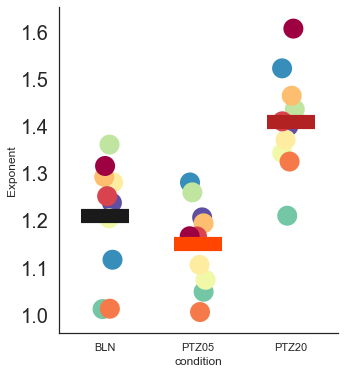

In [137]:
adfn.bar_scatter_plot(ex_df, 'Exponent', (5,6), 7, 20, mean_colours, colours)

In [147]:
bln = ex_df[ex_df['condition'] == 'BLN']['Exponent']
p5 = ex_df[ex_df['condition'] == 'PTZ05']['Exponent']
p20 = ex_df[ex_df['condition'] == 'PTZ20']['Exponent']
eig_list = bln, p5, p20
for i in range(len(eig_list)):
    adfn.mean_std(cond[i], eig_list[i])

BLN mean = 1.209375090797737  , std = 0.038782897878834384
PTZ05 mean = 1.1515878088966225  , std = 0.028604107828698936
PTZ20 mean = 1.4100907817701143  , std = 0.034745605922581184


In [149]:
adfn.stats_2samp(bln, p5, 0.05, 2, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 12.0   p = 0.130859375


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [150]:
adfn.stats_2samp(bln, p20, 0.05, 2, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.001953125


## Eigenspectra during state transitions

In [162]:
## Calculate eigenspectra during state transitions
sz_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE','*PTZ20*_realtrace.npy')
sz_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy']

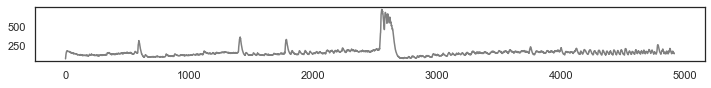

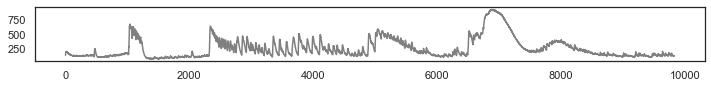

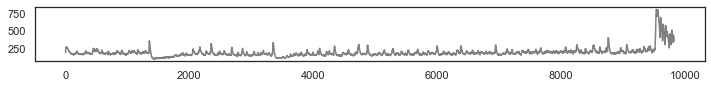

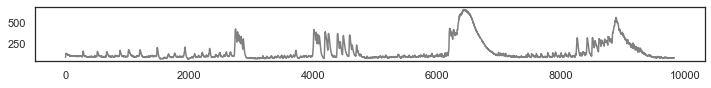

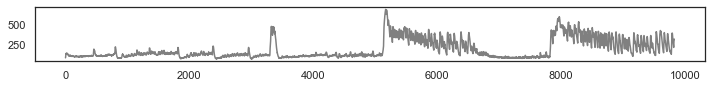

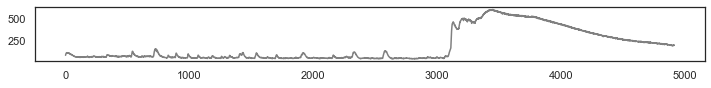

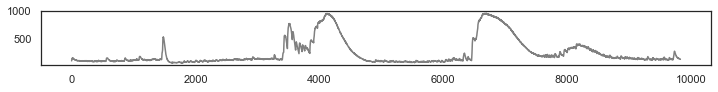

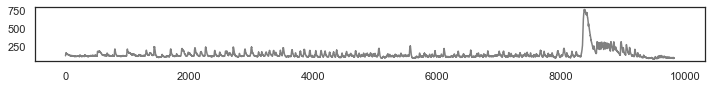

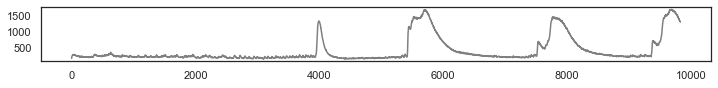

In [163]:
gen_list = []
for o in range(len(sz_list)):
    p20 = np.load(sz_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    #arbitrary threshold - max trace is 4x higher than min trace
    #only plot traces that fulfill this requirement
    if 4*mini < maxi: 
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, sz_list[o])
        plt.show()

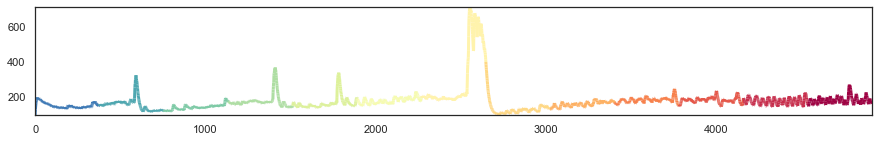

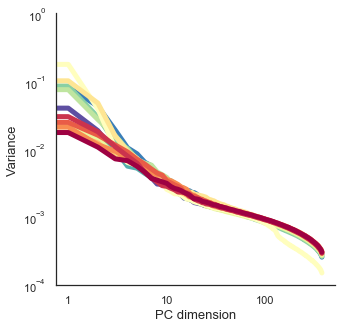

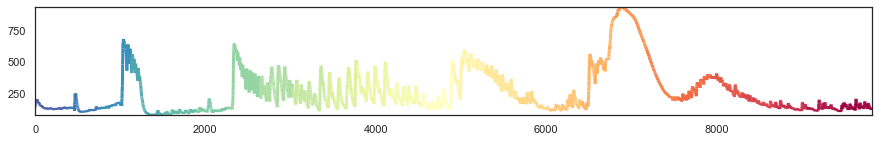

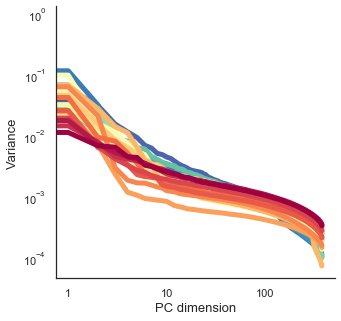

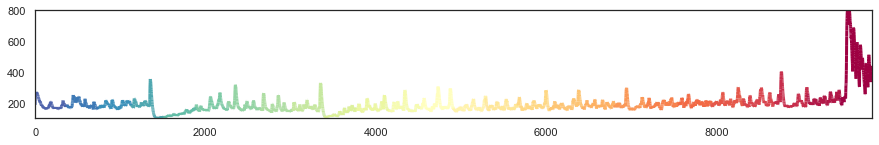

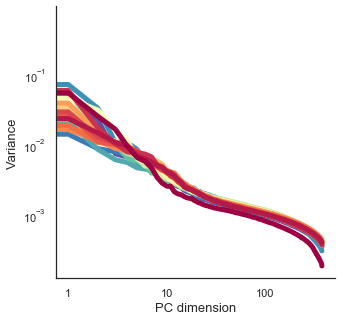

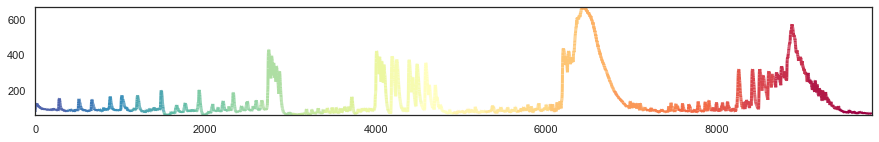

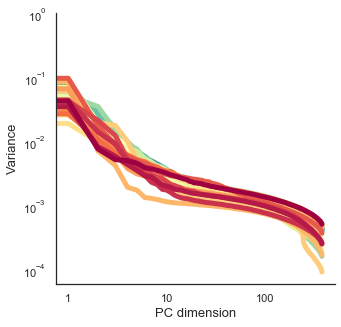

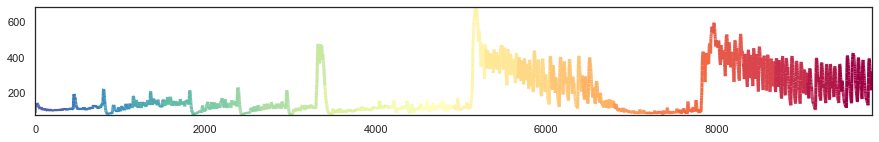

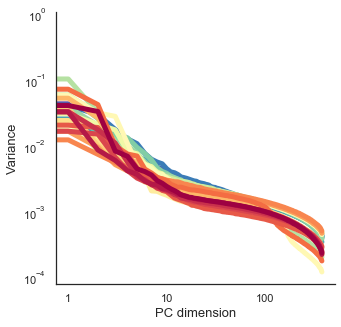

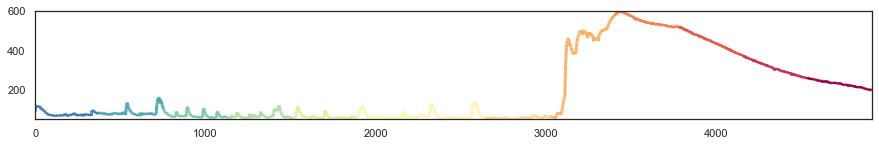

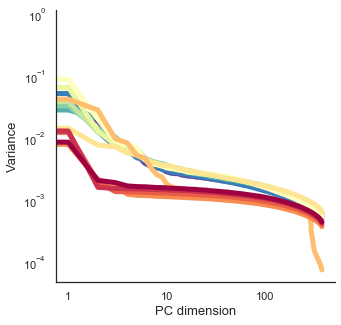

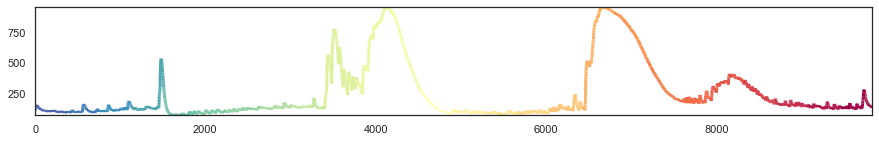

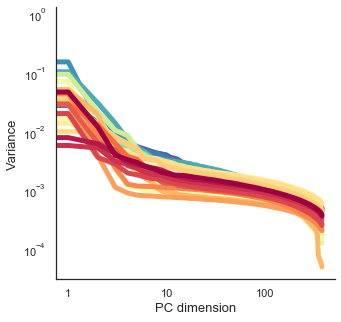

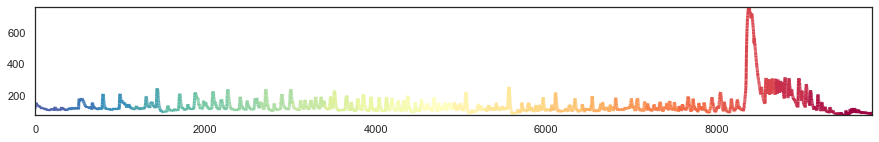

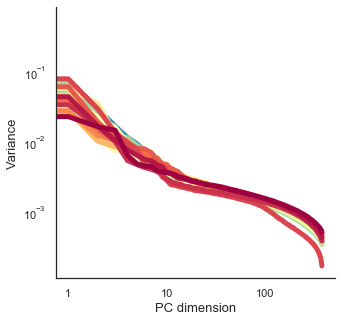

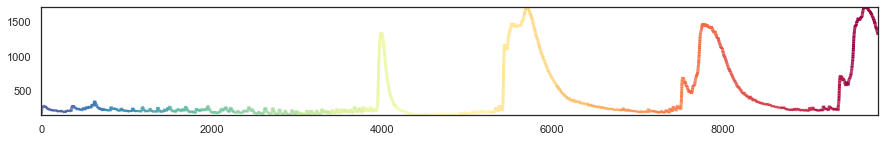

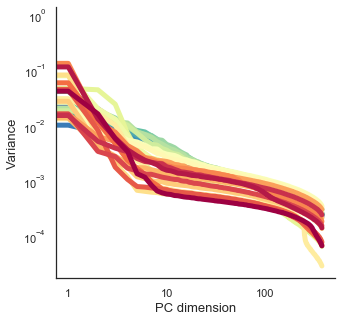

In [184]:
#Plot eigenspectra over time
%autoreload
for o in range(len(gen_list)):
    choose = o
    data = np.load(gen_list[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(370, mean.shape[0])[0]
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))

    #PLOT MEAN DIST BY SEGMENTS
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window

    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (15,2))
    lc = LineCollection(segments, cmap=plt.get_cmap('Spectral_r'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(3)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #EIGENSPECTRUM and plot
    import matplotlib
    import sys
    from scipy import stats
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        n_components = sub_data.shape[1]
        data_list[count1] = efn.eigspec(sub_data, n_components) #calculat eigenspec
        count+=window
        count1+=1
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Spectral_r(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(data_list)):
        xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
        yaxis = data_list[i]
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 5, markersize = 0.5, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC dimension', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()


# Manifold smoothness
* eigenspectrum model

In [462]:
def visualise_PCvar(alp, n_samples, theta, n_features, n_components):
    proj, W, X = efn.rand_project(n_samples, n_features, n_components, alp, theta)

    take = 20
    col  = cm.coolwarm(np.linspace(0,1,take))
    fig, axarr = plt.subplots(figsize = (10,5))
    for i in range(take):
        plt.plot(X[i*2], alpha = 1, c = col[i])
    plt.show()

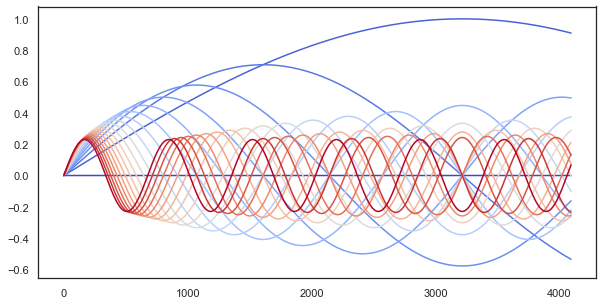

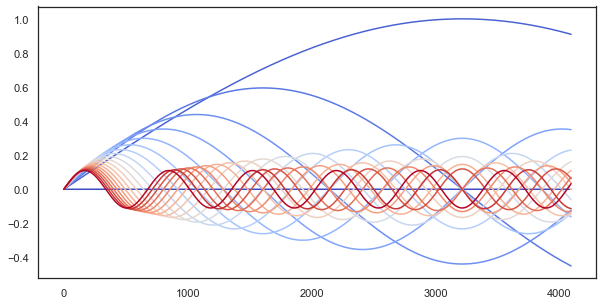

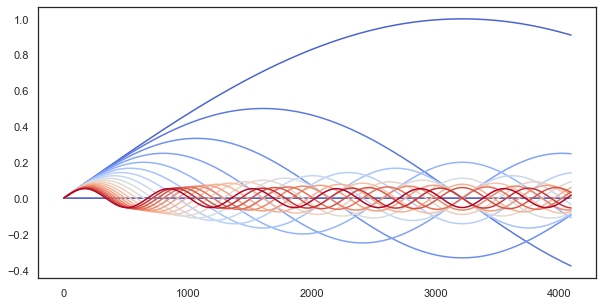

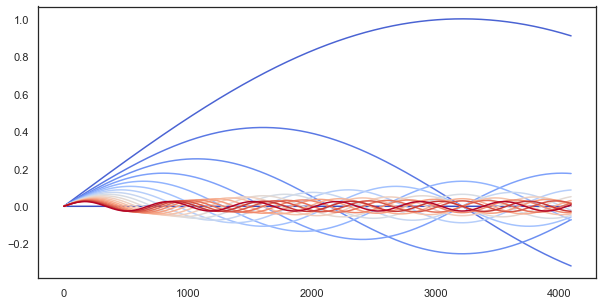

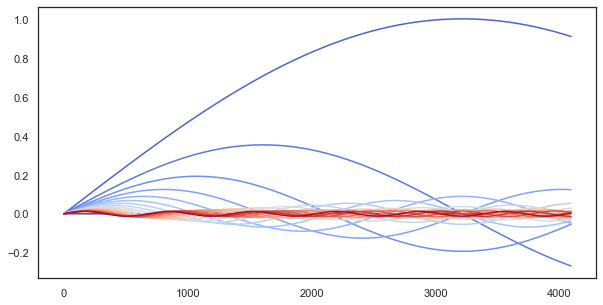

In [463]:
#Visualise what happens to PC variance as you increase alpha

alp_list = np.linspace(1, 3, 5)
#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4

for alp in alp_list:
    visualise_PCvar(alp, n_samples, theta, n_features, n_components)


In [282]:
#Visualise the changing eigenspectrum slope as a function of alpha
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = np.linspace(0, 4, 50)

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = efn.rand_project(n_samples, n_features, n_components, alp[i], theta)

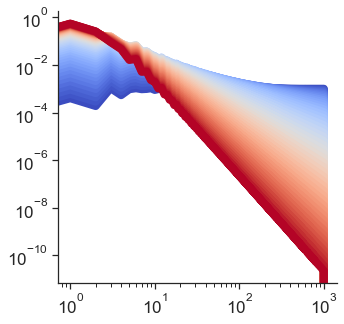

In [283]:
#Visualise the changing eigenspectrum slope as a function of alpha

from matplotlib import cm
col  = cm.coolwarm(np.linspace(0,1,len(alp)))

fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(alp)):
    data = efn.eigspec_sim(X_list[i])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 8, markersize = 1, alpha = 1, color = col[i])
    

axarr.set_xscale('log')
axarr.set_yscale('log')
plt.yticks(size = 17)
plt.xticks(size = 17, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()  

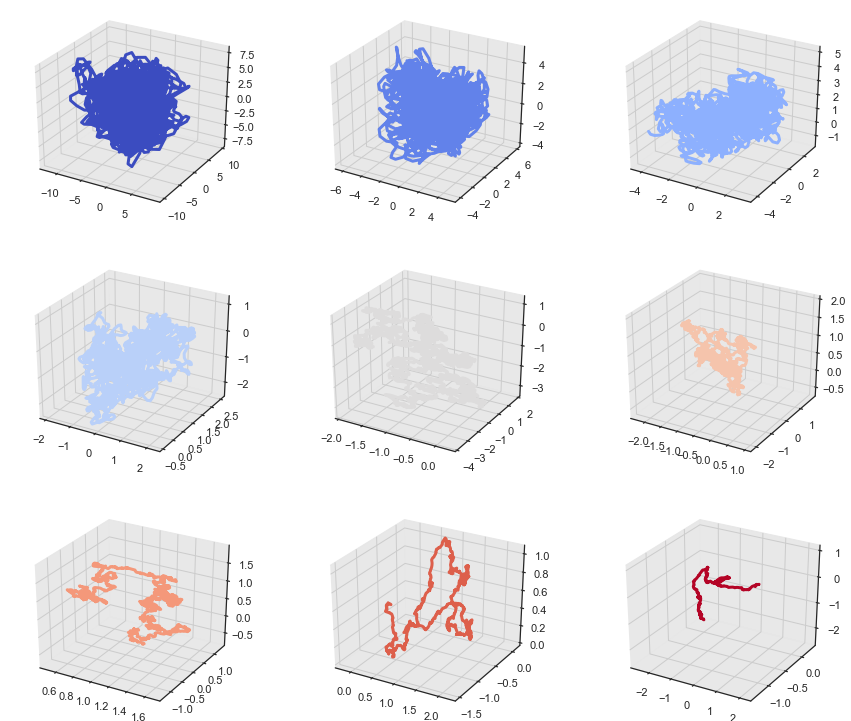

In [287]:
#Visualise the smoothening of the manifold as a function of alpha

from mpl_toolkits.mplot3d import Axes3D

#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 5000
n_components = 4
alp = np.linspace(1, 3, 9)
col  = cm.coolwarm(np.linspace(0,1,len(alp)))
fig = plt.figure(figsize= (15,13))

for i in range(len(alp)):
    proj, W, X = efn.rand_project(n_samples, n_features, n_components, alp[i], theta)
    
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    dotplot = ax.plot(proj[0,:], proj[1,:],proj[2,:], alpha = 1, color = col[i], linewidth = 3)

    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

plt.show()

In [403]:
bln = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN*cutrealtrace*')
p5 = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ05*cutrealtrace*')
p20 = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20*cutrealtrace*')
bln, p5, p20

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILD

In [297]:
#find PCs
def PC(input_data, n_components):
    from sklearn import decomposition

    pca = decomposition.PCA(n_components)
    fit = pca.fit(input_data)
    output_data = fit.components_
    return(output_data)

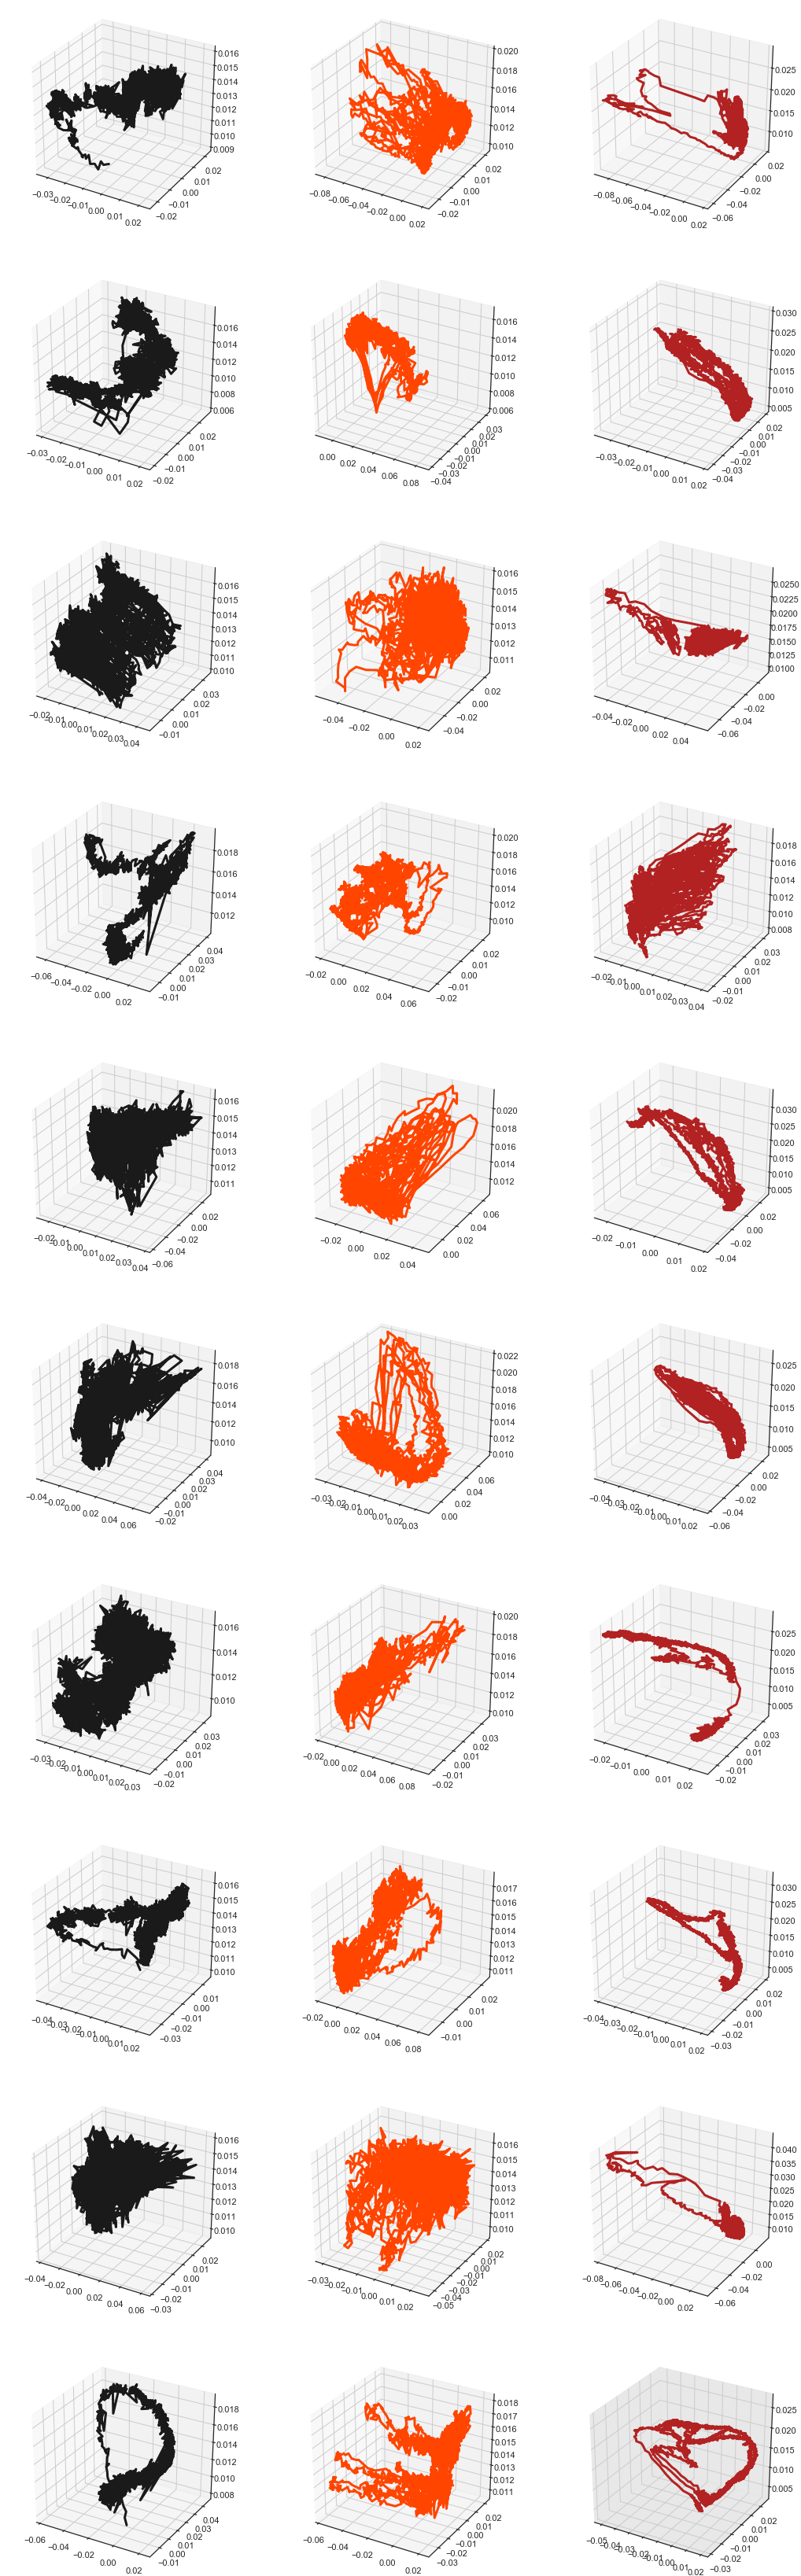

In [306]:
#Visualise smoothness in empirical data

from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

col_list = ['k', 'orangered', 'firebrick']

data_list = [bln, p5, p20]
fig = plt.figure(figsize=(18,60))
count=0

for i in range(len(data_list[0])):
    for e in range(len(data_list)):
        data = PC(np.load(data_list[e][i]), 4)
        
        data = data.T
        filt_data = gaussian_filter(data, 0.4)

        ax = fig.add_subplot(10, 3, count+1, projection='3d')
        dotplot = ax.plot(filt_data[:,2], filt_data[:,1],filt_data[:,0], alpha = 1, linewidth = 3, c = col_list[e])
        count+=1

ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


# Velocity

In [378]:
#Visualise the changing eigenspectrum slope as a function of alpha
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 500
n_components = 4
alp = np.linspace(1, 3, 50)

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = efn.rand_project(n_samples, n_features, n_components, alp[i], theta)

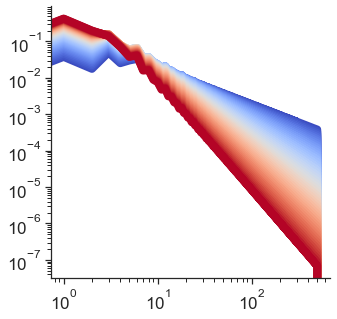

In [399]:
#Visualise the changing eigenspectrum slope as a function of alpha

from matplotlib import cm
col  = cm.coolwarm(np.linspace(0,1,len(alp)))

fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(alp)):
    data = efn.eigspec_sim(X_list[i])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 8, markersize = 1, alpha = 1, color = col[i])
    

axarr.set_xscale('log')
axarr.set_yscale('log')
plt.yticks(size = 17)
plt.xticks(size = 17, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()  

In [313]:
def state_dist(data):
    dist = np.zeros((data.shape[1])-1)
    for i in range(dist.shape[0]): 
        dist[i] = np.linalg.norm(data[:,i] - data[:,i+1])#euclidean distance distribution
    return(dist)

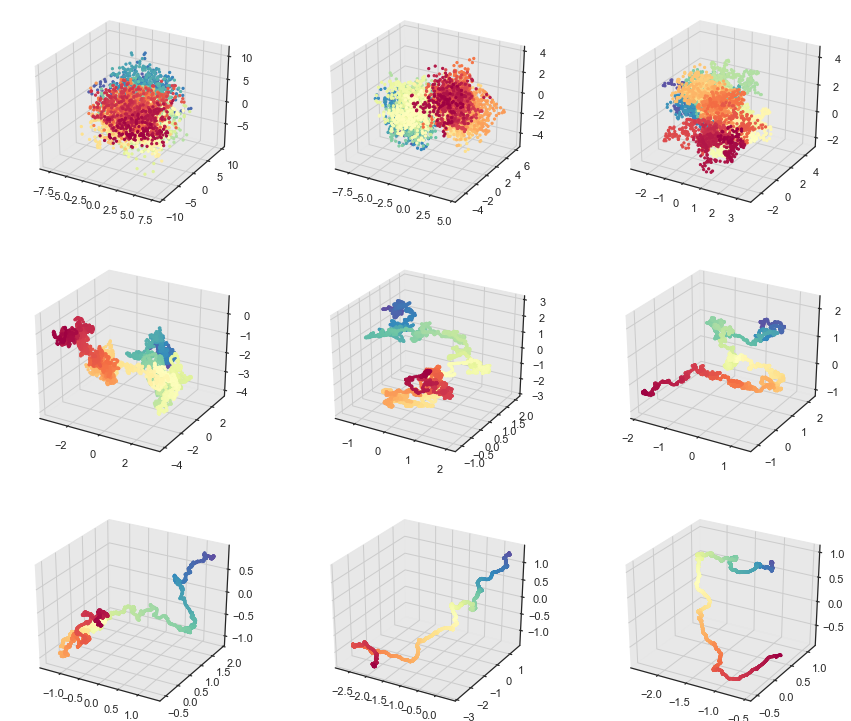

In [309]:
#Visualise the velocity as a function of alpha

from mpl_toolkits.mplot3d import Axes3D

#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 5000
n_components = 4
alp = np.linspace(1, 3, 9)
col  = cm.coolwarm(np.linspace(0,1,len(alp)))
fig = plt.figure(figsize= (15,13))

for i in range(len(alp)):
    proj, W, X = efn.rand_project(n_samples, n_features, n_components, alp[i], theta)
    
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    dotplot = ax.scatter3D(proj[0,:], proj[1,:],proj[2,:], c = np.linspace(0,proj.shape[1],proj.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')


    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

plt.show()

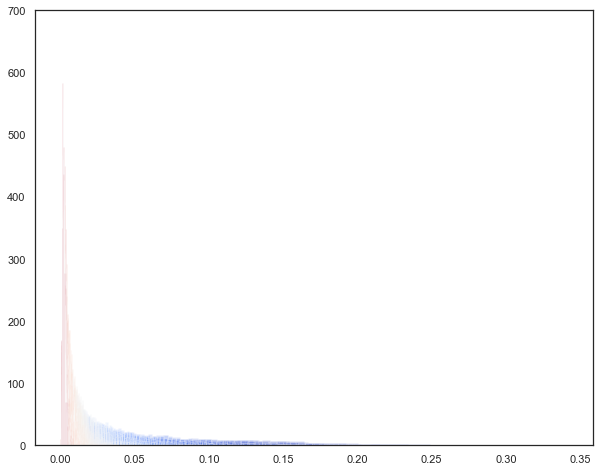

In [400]:
#Plot state velocity as a function of alpha - i have no idea why the color is so faint

fig, ax = plt.subplots(figsize = (10,8))

for i in range(len(proj_list)):
    ax.hist(efn.state_dist(proj_list[i][1:,:]), bins = 50 ,alpha = 0.2, density = True, color = col[i])
plt.show()

In [363]:
#find PCs
def PC1(input_data, n_components):
    from sklearn import decomposition

    pca = decomposition.PCA(n_components)
    fit = pca.fit(input_data)
    output_data = fit.components_
    return(output_data)

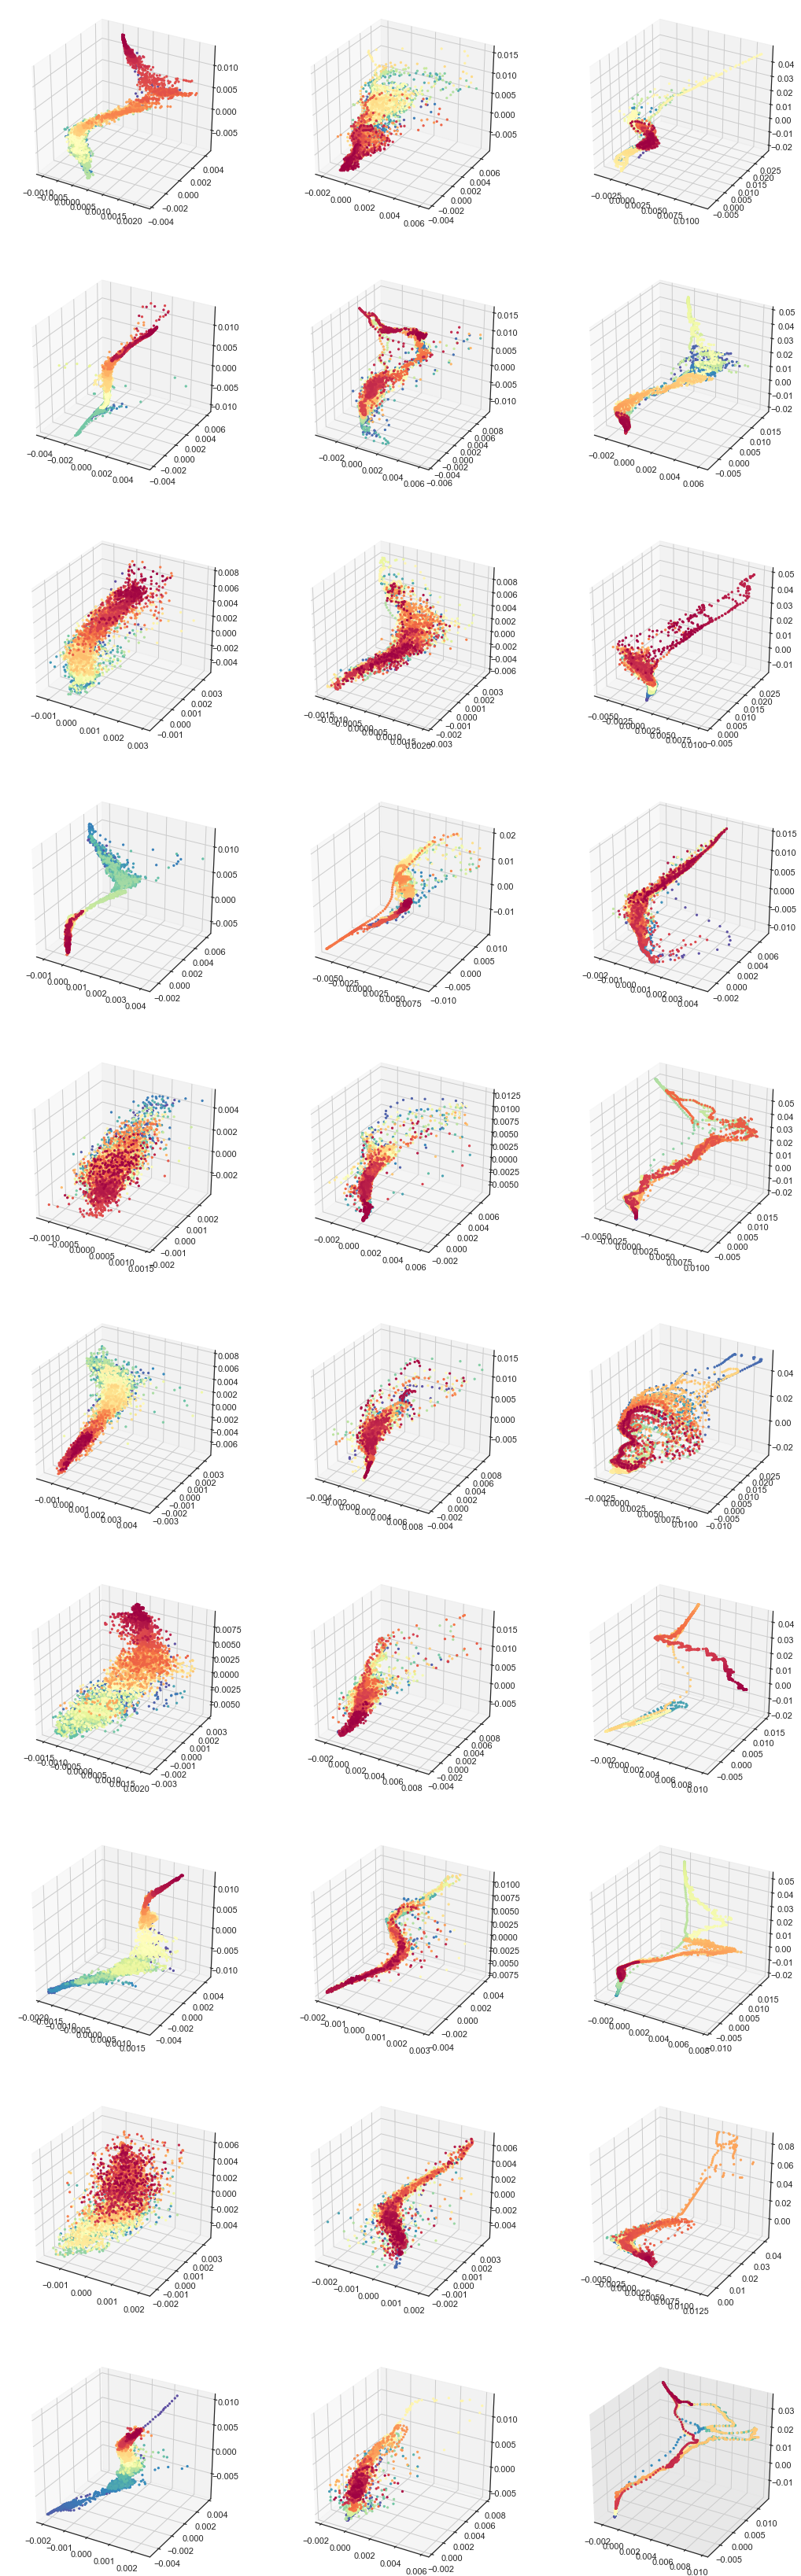

In [374]:
#Visualise the velocity in empirical data

from mpl_toolkits.mplot3d import Axes3D
col_list = ['k', 'orangered', 'firebrick']

data_list = [bln, p5, p20]
fig = plt.figure(figsize=(18,60))
count=0

for i in range(len(data_list[0])):
    for e in range(len(data_list)):
        data = PC1(np.load(data_list[e][i]), 4)

        tau, m = lfn.find_taum(data, 10) #find tau and m
        embed = lfn.takens_embed(m, tau, data) #embed data
        manifold = efn.nonlinembed(embed) #do isomap for visualisation
        filt_data = gaussian_filter(manifold, 0.9)

        ax = fig.add_subplot(10, 3, count+1, projection='3d')
        dotplot = ax.scatter3D(filt_data[:,2], filt_data[:,1],filt_data[:,0], c = np.linspace(0,filt_data.shape[0],filt_data.shape[0]), s = 5, alpha = 1, cmap = 'Spectral_r')
        count+=1

ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


In [ ]:
#LE embed and calculate state distance
data_list = [bln, p20]

b_list, sz_list = list(range(len(bln))),list(range(len(bln)))
for i in range(len(data_list[0])):
    fig, ax = plt.subplots(figsize = (4,3))
    for e in range(len(data_list)):
        data = PC1(np.load(data_list[e][i]), 4)

        tau, m = lfn.find_taum(data, 10) #find tau and m
        embed = lfn.takens_embed(m, tau, data) #embed data
        
        prac = efn.state_dist(embed.T)
        if e == 0:
            b_list[i] = prac
        elif e == 1:
            sz_list[i] = prac


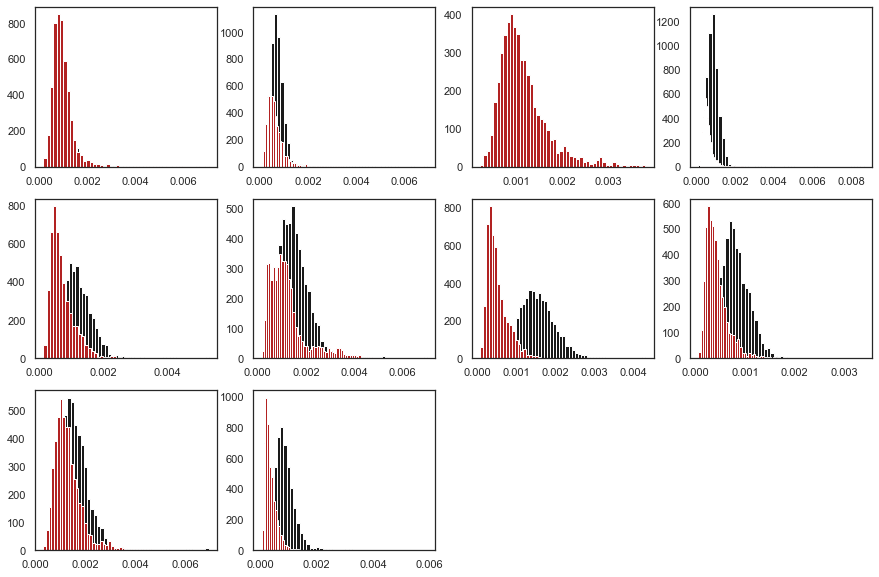

In [444]:
plot_list = [b_list, sz_list]
col_list = ['k', 'firebrick']
width_list = [1,1]
style_list = ['-','-']
rows = 3
cols = 4
size = (15,10)
adfn.multi_plot_share(plot_list,col_list, 'hist', size, 3, 4, 'lin')

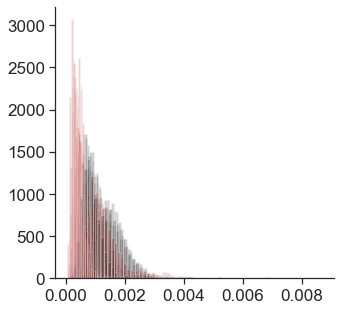

In [411]:
fig, ax = plt.subplots(figsize = (5,5))

col  = cm.coolwarm(np.linspace(0,1,10))

for i in range(10):
    curr = b_list[i]
    ax.hist(curr, bins = 50 ,alpha = 0.2, density = True, color = 'k')
    curr = sz_list[i]
    ax.hist(curr, bins = 50 ,alpha = 0.2, density = True, color = 'firebrick')
plt.yticks(size = 17)
plt.xticks(size = 17, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()